In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def fit_terrain(terrain, window_size, degree):  # terrain - ЦМР (numpy.ndarray); window_size - размер окна (int); degree - степень полинома (int)
    rows, cols = terrain.shape
    fit_terrain = np.zeros_like(terrain)

    for i in range(rows):
        for j in range(cols):
            
            # Определение границ окна
            start_i = max(0, i - window_size // 2)
            end_i = min(rows, i + window_size // 2 + 1)
            start_j = max(0, j - window_size // 2)
            end_j = min(cols, j + window_size // 2 + 1)

            # Извлечение значений в пределах текущего окна
            window = terrain[start_i:end_i, start_j:end_j]
            
            # print(window.shape[0], window.shape[1])
            
            # Координаты элементов в рамках текущего окна
            coords = np.zeros((window.size, 2))
            for k in range(window.shape[0]):
                for l in range(window.shape[1]):
                    coords[k * window.shape[1] + l] = np.array([k, l])
            
            # Коэффициенты для полинома второй степени
            degrees = [(i, j) for i in range(degree+1) for j in range(degree+1) if i + j < degree]
            
            # Значения для степеней соответствующих коэффициентов
            matrix = np.stack([np.prod(coords**d, axis=1) for d in degrees], axis=-1)
            
            # Коэффициенты при соответствующих членах полинома
            coeff = np.linalg.lstsq(matrix, window.flatten(), rcond=None)[0]
            
            # Вычисление аппроксимирующего значения в центре окна и запись его в результирующий массив
            fit_window = np.dot(matrix, coeff)
            fit_terrain[i, j] = fit_window.reshape(window.shape)[window_size // 2, window_size // 2]

    return fit_terrain

In [13]:
# Полусфера
R = 50

arr_sph = np.zeros((2*R+1, 2*R+1), dtype = 'float')
nrows = arr_sph.shape[0]
ncols = arr_sph.shape[1]

for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(-(float(x)-R)**2 - (float(y)-R)**2 + R**2)
            arr_sph[x][y] = z
        except ValueError:
            pass

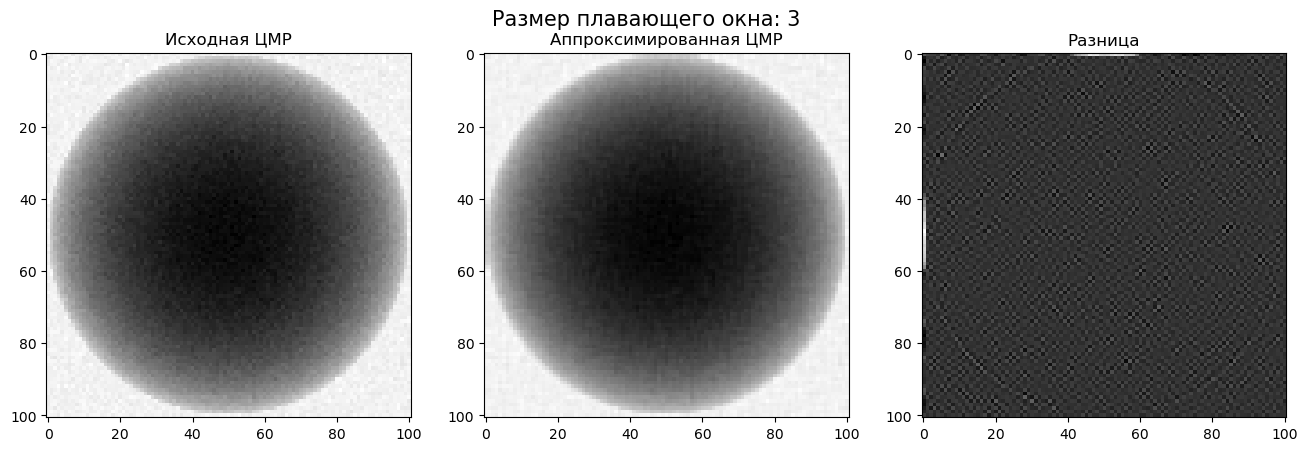

Средняя разница: -0.02664132158483027


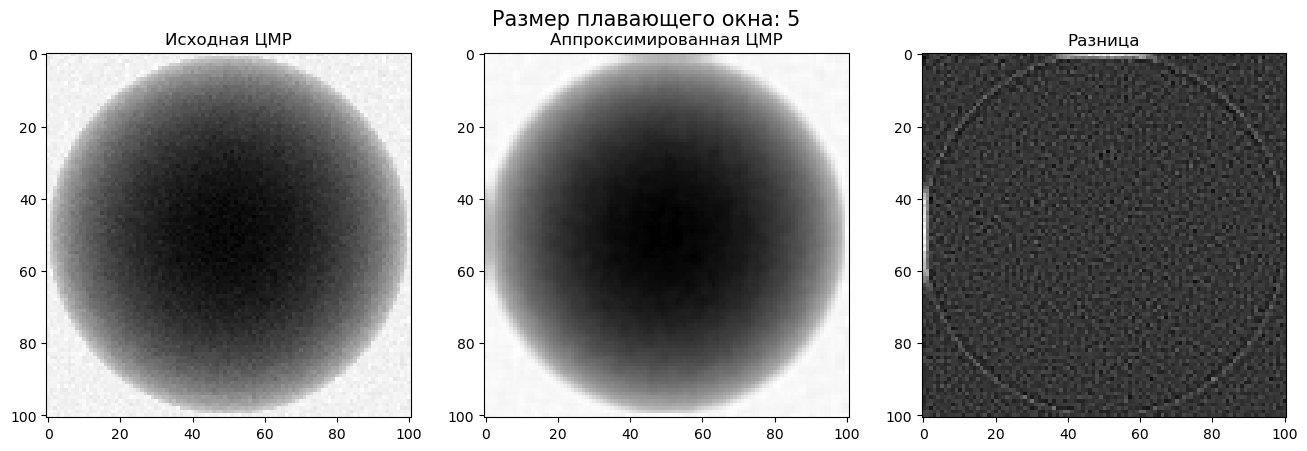

Средняя разница: -0.08723920054494011


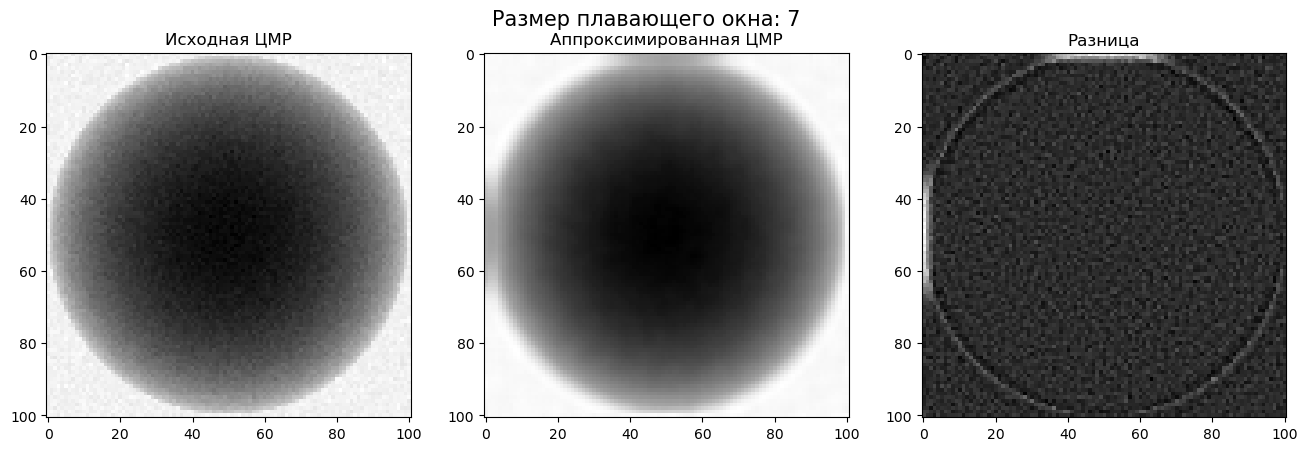

Средняя разница: -0.1762732421185894


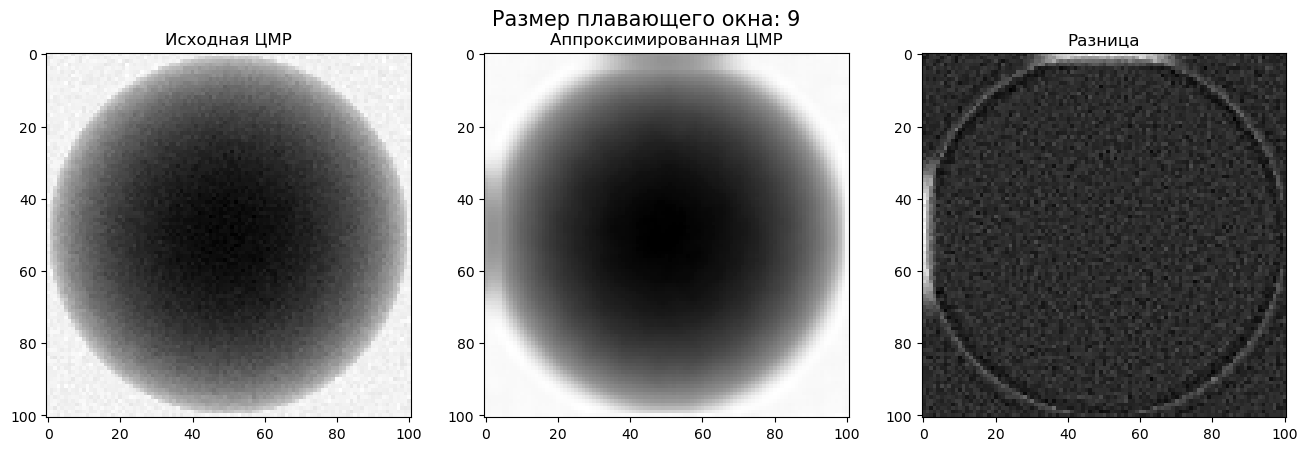

Средняя разница: -0.2917935206575203


In [15]:
# Пример использования для полусферы, зашумлённой нормально распределённым шумом
# terrain = np.random.rand(100, 100)
arr_n = np.random.randn(nrows, ncols)
arr_sph_n = arr_sph + arr_n

terrain = arr_sph_n

for window_size in [3, 5, 7, 9]:
    approx_terrain = fit_terrain(terrain, window_size, degree=3)

    fig = plt.figure(figsize=(16, 11))
    plt.suptitle(f'Размер плавающего окна: {window_size}', y=0.7, fontsize=15)
    
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.set_title('Исходная ЦМР')
    ax1.imshow(terrain, cmap='binary')

    ax2 = fig.add_subplot(1, 3, 2)
    ax2.set_title('Аппроксимированная ЦМР')
    ax2.imshow(approx_terrain, cmap='binary')

    ax3 = fig.add_subplot(1, 3, 3)
    ax3.set_title('Разница')
    ax3.imshow(terrain - approx_terrain, cmap='binary')

    plt.show()

    print(f'Средняя разница: {np.mean((terrain - approx_terrain))}')